 ***Import Libraries***


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


***Load and Explore Dataset***


In [82]:
df = pd.read_csv('Iris.csv')

*Quick look*

In [84]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [85]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [86]:
print(df.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [87]:
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [88]:
# Drop unnecessary columns (like 'Id' if present)
df = df.drop(columns=['Id'])

# Encode target if needed
# If 'Species' is categorical, scikit-learn can handle it directly


In [89]:
X = df.drop('Species', axis=1)
y = df['Species']

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [90]:
# Initialize KNN (try with k=3 first)
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [91]:
# Make Predictions
y_pred = knn.predict(X_test)


In [92]:
#Evaluate the Model
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 1.00


In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [94]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



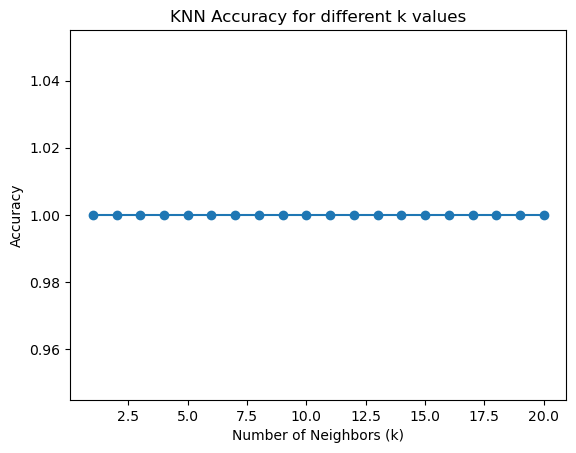

In [95]:
#Visualize Accuracy vs k (optional but recommended)
# Check accuracy for different k values
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

# Plot
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.show()


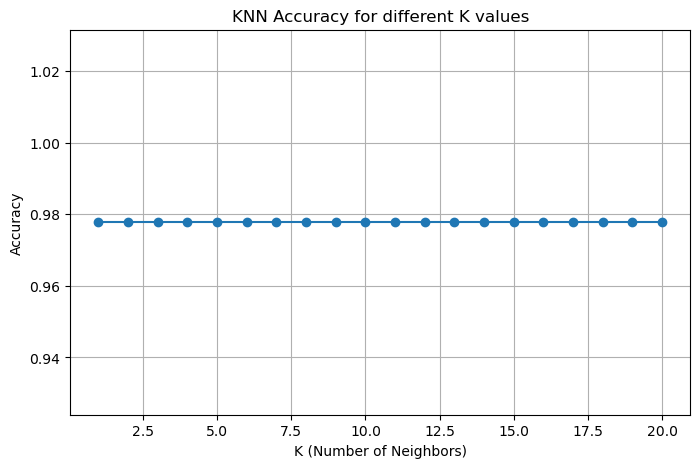

Accuracy (k=20): 0.98
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

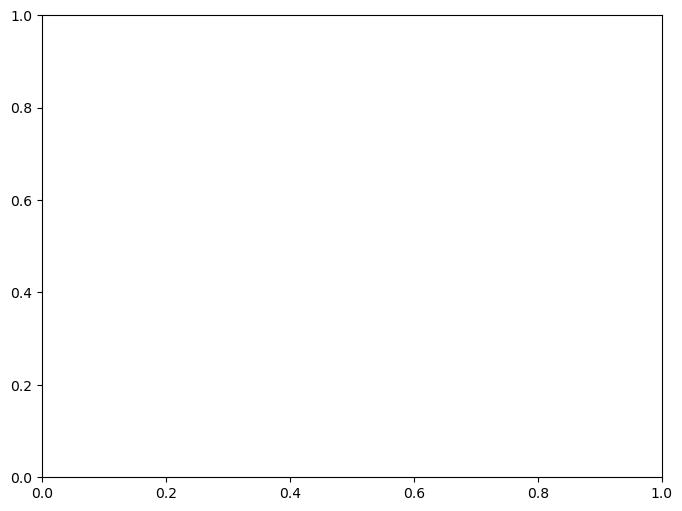

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# 1️⃣ Load and Normalize Data
df = pd.read_csv('Iris.csv')

# Features and target
X = df.drop('Species', axis=1).values
y = df['Species'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 2️⃣ Use KNeighborsClassifier
# Try initial K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# 3️⃣ Experiment with different K
k_range = range(1, 21)
scores = []

for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    score = knn_k.score(X_test, y_test)
    scores.append(score)

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title('KNN Accuracy for different K values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 4️⃣ Evaluate Model
print(f'Accuracy (k={k}): {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# 5️⃣ Visualize Decision Boundaries (2D projection)

# Select two features for 2D plot
X_vis = X_scaled[:, [0, 2]]  # SepalLength & PetalLength

# Train again on two features
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y, test_size=0.3, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=k)
knn_vis.fit(X_train_v, y_train_v)

# Create meshgrid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], cmap=cmap_bold, edgecolor='k')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.title(f'KNN Decision Boundary (k={k})')
plt.show()
